In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
 
weekday_map = {
    0: 'Seg.',
    1: 'Terç.',
    2: 'Qua.',
    3: 'Qui.',
    4: 'Sex.',
    5: 'Sáb.',
    6: 'Dom.'
}

def plot_means_by_day(df_mean_consumption=[], csv=[]):
    fig = plt.figure(figsize=(15, 15))
    outer = gridspec.GridSpec(3, 2, wspace=0.3, hspace=0.3)

    for i in range(6):

        df_mean = df_mean_consumption[i]

        ax = plt.Subplot(fig, outer[i])
        ax.plot(
            ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'],
            df_mean_consumption[i],
            'o-'
        )
        ax.set(title=csv[i])
        ax.set_ylabel('Wh')
        if i >= 4:
            ax.set_xlabel('Dia da semana')
        fig.add_subplot(ax)
    
    fig.show()
    
def plot_means_by_hour(df_means=[], csv=[]):
    fig = plt.figure(figsize=(18, 18))
    outer = gridspec.GridSpec(3, 2, wspace=0.3, hspace=0.3)

    for i in range(6):
        inner = gridspec.GridSpecFromSubplotSpec(7, 1,
                        subplot_spec=outer[i], wspace=0.2, hspace=0.2)
        df_mean = df_means[i]

        for j in range(7):
            ax = plt.Subplot(fig, inner[j])
            ax.plot(
                df_mean[df_mean['iso_weekday'] == j]['hour_of_day'],
                df_mean[df_mean['iso_weekday'] == j]['total_consumption'],
                'o-'
            )
            if j == 0:
                ax.set(title=csv[i])
            ax.set_ylabel(f'{weekday_map[j]}')
            if i >= 4:
                ax.set_xlabel('Hora do dia (formato 24h)')
            fig.add_subplot(ax)
    
    fig.show()

In [2]:
import pandas as pd

files = [
    'medidas_04-05-2021/quarterly_measurements_CPD1.csv',
    'medidas_04-05-2021/quarterly_measurements_CPD2.csv',
    'medidas_04-05-2021/quarterly_measurements_FT I.csv',
    'medidas_04-05-2021/quarterly_measurements_FT III (GRACO).csv',
    'medidas_04-05-2021/quarterly_measurements_UED1.csv',
    'medidas_04-05-2021/quarterly_measurements_UED2.csv'
]

building = [
    'CPD1',
    'CPD2',
    'FT I',
    'FT III',
    'UED1',
    'UED2',
]

df_means_by_day = []
df_means_by_hour = []

for file in files:
    df = pd.read_csv(file)
    
    df['collection_date'] = pd.to_datetime(df['collection_date'], format='%Y-%m-%d %H:%M:%S')
    df['total_consumption'] = df['consumption_peak_time'] + df['consumption_off_peak_time']
    
    df['iso_weekday'] = df['collection_date'].dt.dayofweek
    df_mean_consumption = df.groupby('iso_weekday')['total_consumption'].mean()
    df_means_by_day.append(df_mean_consumption)
    
    df['hour_of_day'] = df['collection_date'].dt.hour
    df_mean_by_weekday_and_hour = df.groupby(['iso_weekday', 'hour_of_day'])['total_consumption'].mean().reset_index()
    df_means_by_hour.append(df_mean_by_weekday_and_hour)

/home/vinicius/tcc_1/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


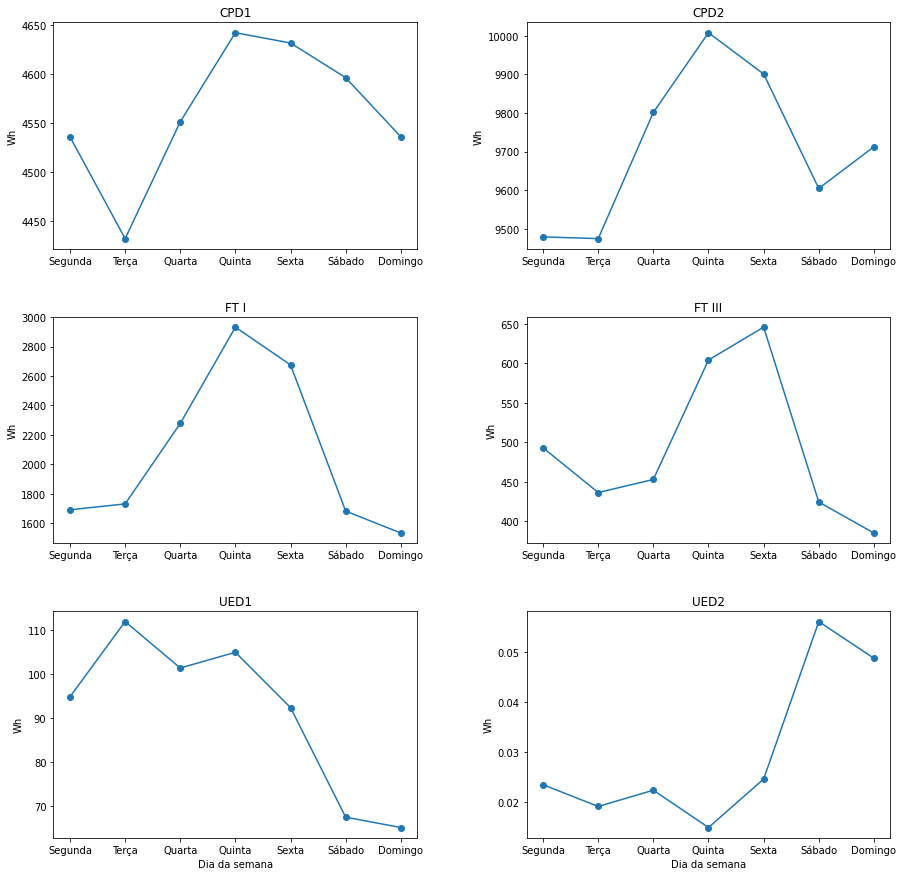

In [3]:
plot_means_by_day(df_means_by_day, building)

/home/vinicius/tcc_1/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


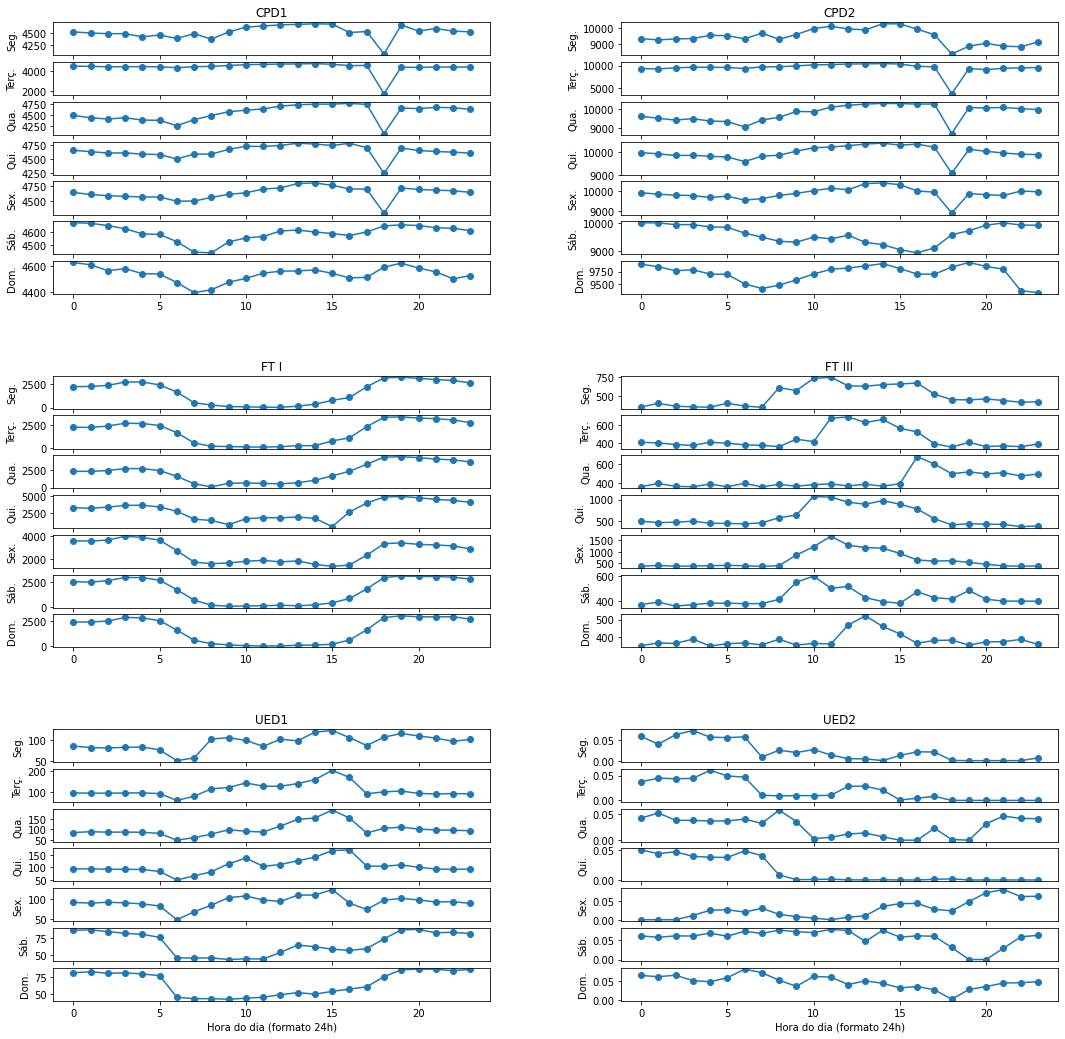

In [4]:
plot_means_by_hour(df_means_by_hour, building)